<a href="https://colab.research.google.com/github/AshuPraja13/Data-Science/blob/main/Dog_Breed_Final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem: Identify the breed of dogs by differentiating images over 120 classes.**

Highlights:
1. Importing datasets from kaggle & unzipping.
2. Preprocesing images using tensorflow.
3. Reducing data imbalance using Image Agumentation.
4. Using ensemble & dropouts to reduce overfitting of the model.
5. Creating a model and hypaerparameter tuning to fit for minimum validation
 loss.
6. Testing model with open source image.

Importing dataset, library and preprocessing

In [ ]:
import kaggle

In [ ]:
!mv kaggle.json /root/.kaggle

In [ ]:
!kaggle competitions download -c dog-breed-identification

100% 689M/691M [00:03<00:00, 216MB/s]
100% 691M/691M [00:03<00:00, 209MB/s]


In [ ]:
!unzip -q dog-breed-identification.zip

In [ ]:
!rm -rvf sample_submission.csv test dog-breed-identification.zip

Streaming output truncated to the last 5000 lines.
removed 'test/82e5e34cc18b267ef7057cc92de8b44b.jpg'
removed 'test/82e64f28df4fff22beb11e9a1e413212.jpg'
removed 'test/82ec6bdf968a14923340179515ce5546.jpg'
removed 'test/82ee3ee4dc01b33203a049c6c3338034.jpg'
removed 'test/82f07a63a1f03ff9d8e0f4a8458caa93.jpg'
removed 'test/82f5fb0bdaff30a4a3374e2d9915856c.jpg'
removed 'test/82fbff1bd375474e3d4ec5cbfde3f9f0.jpg'
removed 'test/8301c772feb7f4068473f0157ae58f9b.jpg'
removed 'test/8307be57a9d76c1584e16801a39cb1dc.jpg'
removed 'test/831a38bd2cfa0a093967d5b6c1ac09dc.jpg'
removed 'test/831ef824af939f9754e3593638933b64.jpg'
removed 'test/8322f53b29325419ef3bcf7cf10d7172.jpg'
removed 'test/83233e2774e116ef34a04c53dd00a282.jpg'
removed 'test/832cae23410e741ecd2014b3818ed7c4.jpg'
removed 'test/833f90a3652b06607b55bd25c8d97457.jpg'
removed 'test/8341f50a86c819b3cb8828740a97e7ef.jpg'
removed 'test/834bb31410410852082813d2e07c3290.jpg'
removed 'test/834f6aaff5dd8f7159bc3c9afeaaead7.jpg'
removed 'test

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [ ]:
df = pd.read_csv('labels.csv')
df['id']  = df['id'] + '.jpg'
df=df.sample(frac=1)
df

,id,breed
3639,5a73316d885b4b6e4d9845100f762e4c.jpg,boxer
9005,e224c29118a187dccba77b4aaa355767.jpg,collie
3901,60f0b8502d8a96844061d2984ecff6db.jpg,collie
3319,52651a457e5f51270ba111b305869cfe.jpg,borzoi
979,181e91cb6caf6739478d06231faa053d.jpg,sussex_spaniel
...,...,...
214,04ea8788cfa17d01c87ea4cdaa0a330d.jpg,briard
2868,46daf677d38d97d6ed2c5439abbcd8dd.jpg,borzoi
3468,566696d17bc3292fe82eccb6e20f6bda.jpg,shih-tzu
3271,513c41ada00c0d75af37b87a3ad00022.jpg,tibetan_terrier


In [ ]:
data = pd.DataFrame([(df['breed'].value_counts().index),(df['breed'].value_counts().values)]).T
data= data.rename(columns={0:'breed',1:'count'})
data

,breed,count
0,scottish_deerhound,126
1,maltese_dog,117
2,afghan_hound,116
3,entlebucher,115
4,bernese_mountain_dog,114
...,...,...
115,golden_retriever,67
116,brabancon_griffon,67
117,komondor,67
118,eskimo_dog,66


In [ ]:
data['weight'] = (1/data['count'])*(10222/120)
data

,breed,count,weight
0,scottish_deerhound,126,0.676058
1,maltese_dog,117,0.728063
2,afghan_hound,116,0.734339
3,entlebucher,115,0.740725
4,bernese_mountain_dog,114,0.747222
...,...,...,...
115,golden_retriever,67,1.271393
116,brabancon_griffon,67,1.271393
117,komondor,67,1.271393
118,eskimo_dog,66,1.290657


In [ ]:
df

,id,breed
3639,5a73316d885b4b6e4d9845100f762e4c.jpg,boxer
9005,e224c29118a187dccba77b4aaa355767.jpg,collie
3901,60f0b8502d8a96844061d2984ecff6db.jpg,collie
3319,52651a457e5f51270ba111b305869cfe.jpg,borzoi
979,181e91cb6caf6739478d06231faa053d.jpg,sussex_spaniel
...,...,...
214,04ea8788cfa17d01c87ea4cdaa0a330d.jpg,briard
2868,46daf677d38d97d6ed2c5439abbcd8dd.jpg,borzoi
3468,566696d17bc3292fe82eccb6e20f6bda.jpg,shih-tzu
3271,513c41ada00c0d75af37b87a3ad00022.jpg,tibetan_terrier


In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range= 30,
                                                      width_shift_range=0.2, height_shift_range=0.2,
                                                      brightness_range=(0.6,1.5),
                                                      zoom_range=(0.8,1.2), horizontal_flip=True,
                                                      validation_split=0.1)

In [ ]:
batch_size = 32

In [ ]:
train_idg = idg.flow_from_dataframe(df, 'train/', 'id', 'breed',
                                    target_size=(350,500), batch_size = batch_size,
                                    shuffle=False, subset='training')

Found 9200 validated image filenames belonging to 120 classes.


51

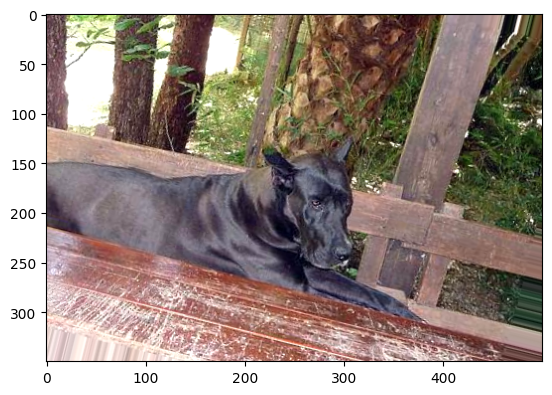

In [ ]:
X,y  = train_idg.next()
plt.imshow(np.squeeze(X.astype(int),axis=0))
y.argmax()

In [ ]:
val_idg = idg.flow_from_dataframe(df, 'train/', 'id', 'breed',
                                    target_size=(350,500), batch_size = batch_size,
                                    shuffle=False, subset='validation')

Found 1022 validated image filenames belonging to 120 classes.


In [ ]:
cw = pd.DataFrame.from_dict(train_idg.class_indices,orient='index').reset_index()
cw = cw.rename(columns={'index':'breed',0:'class_index'})
cw = data.merge(cw,how='left',left_on='breed',right_on='breed')
cw.index = cw['class_index']
cw = cw.drop(columns=['class_index'])
cw = cw['weight']
cw = cw.to_dict()

Creating a model

In [ ]:
input = tf.keras.layers.Input((350,500,3), name='Input_Layer')

vgg_pp =  tf.keras.layers.Lambda(tf.keras.applications.vgg16.preprocess_input, output_shape = (350,500,3), name= "VGG_Preprocess") (input)
vgg_model = tf.keras.applications.vgg16.VGG16(include_top=False, input_shape=(350,500,3))
vgg_model.trainable = False
vgg = vgg_model (vgg_pp)
vgg_gap  = tf.keras.layers.GlobalAveragePooling2D(name='VGG_GAP') (vgg)

resnet_pp = tf.keras.layers.Lambda(tf.keras.applications.resnet_v2.preprocess_input, output_shape = (350,500,3), name = 'Resnet_Prerpocess') (input)
resnet_model = tf.keras.applications.ResNet50V2(include_top=False, input_shape=(350,500,3))
resnet_model.trainable = False
resnet = resnet_model (resnet_pp)
resnet_gap =  tf.keras.layers.GlobalAveragePooling2D(name='Resnet_GAP') (resnet)

concat = tf.keras.layers.Concatenate(name='Concat') ([vgg_gap, resnet_gap])
dropout = tf.keras.layers.Dropout(0.35, name='Dropout') (concat)

dense = tf.keras.layers.Dense(1024, activation = 'relu', name = 'Hidden_Layer') (dropout)
output = tf.keras.layers.Dense(120, activation= 'softmax', name='Output') (dense)

94668760/94668760 [==============================] - 5s 0us/step


In [ ]:
# del model

In [ ]:
model = tf.keras.models.Model(inputs=input, outputs=output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input_Layer (InputLayer)    [(None, 350, 500, 3)]        0         []                            
                                                                                                  
 VGG_Preprocess (Lambda)     (None, 350, 500, 3)          0         ['Input_Layer[0][0]']         
                                                                                                  
 Resnet_Prerpocess (Lambda)  (None, 350, 500, 3)          0         ['Input_Layer[0][0]']         
                                                                                                  
 vgg16 (Functional)          (None, 10, 15, 512)          1471468   ['VGG_Preprocess[0][0]']      
                                                          8                                   

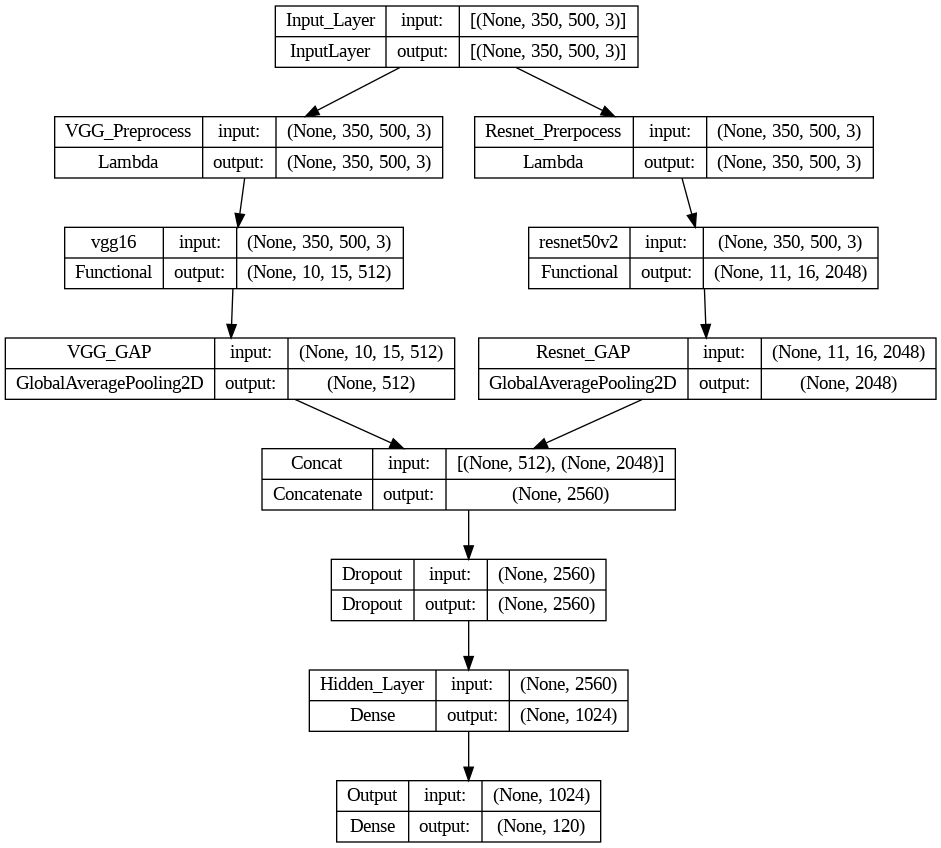

In [ ]:
tf.keras.utils.plot_model(model, show_layer_names=True, show_shapes=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

In [ ]:
# %load_ext tensorboard
# !mkdir logs
# %tensorboard --logdir logs

In [ ]:
tf_callbacks = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [ ]:
tf_mod_call = tf.keras.callbacks.ModelCheckpoint('Dog_Breed_Model',monitor='val_loss', save_best_only=True)

Training the model using callbacks

In [ ]:
model.fit(train_idg, batch_size=batch_size, epochs = 20, validation_data=val_idg, callbacks=[tf_mod_call],class_weight= cw)

Epoch 1/20
288/288 [==============================] - 690s 2s/step - loss: 3.9026 - accuracy: 0.1564 - val_loss: 2.0454 - val_accuracy: 0.5215
Epoch 2/20
288/288 [==============================] - 638s 2s/step - loss: 2.0556 - accuracy: 0.4682 - val_loss: 1.2847 - val_accuracy: 0.6350
Epoch 3/20
288/288 [==============================] - 648s 2s/step - loss: 1.4732 - accuracy: 0.5873 - val_loss: 1.0552 - val_accuracy: 0.7016
Epoch 4/20
288/288 [==============================] - 639s 2s/step - loss: 1.1969 - accuracy: 0.6565 - val_loss: 0.9492 - val_accuracy: 0.7123
Epoch 5/20
288/288 [==============================] - 639s 2s/step - loss: 1.0545 - accuracy: 0.6930 - val_loss: 0.8867 - val_accuracy: 0.7378
Epoch 6/20
288/288 [==============================] - 633s 2s/step - loss: 0.9401 - accuracy: 0.7223 - val_loss: 0.8526 - val_accuracy: 0.7397
Epoch 7/20
288/288 [==============================] - 609s 2s/step - loss: 0.8617 - accuracy: 0.7398 - val_loss: 0.8622 - val_accuracy: 0.7534

In [ ]:
model.to_json()

In [ ]:
plt.figure(figsize=(12,5))
plt.suptitle('Batch_size=32, (350X500),Adam LR=0.0001, Dropout=0.35')
plt.subplot(121)
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.subplot(122)
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()

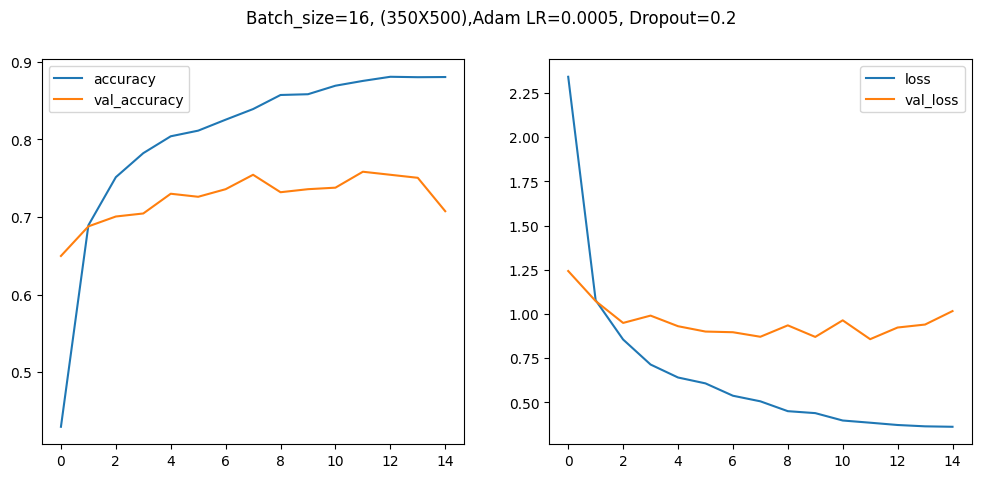

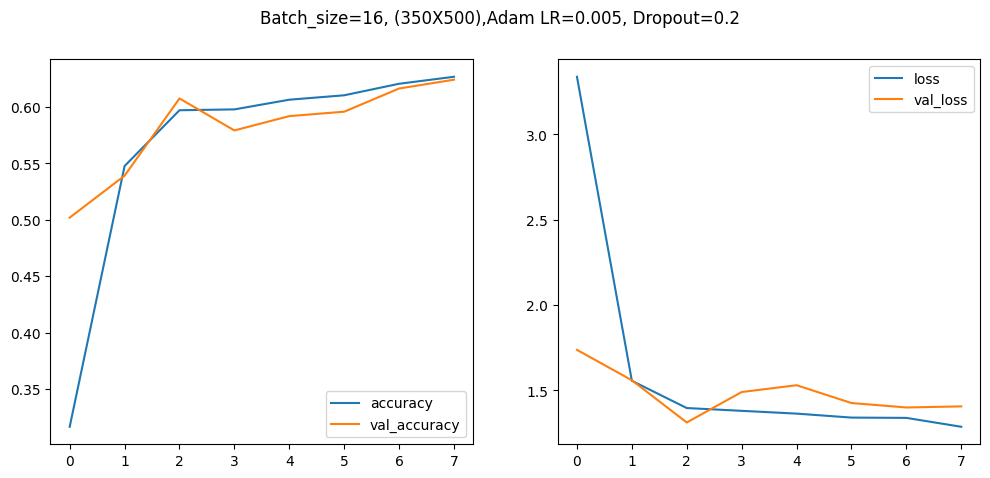

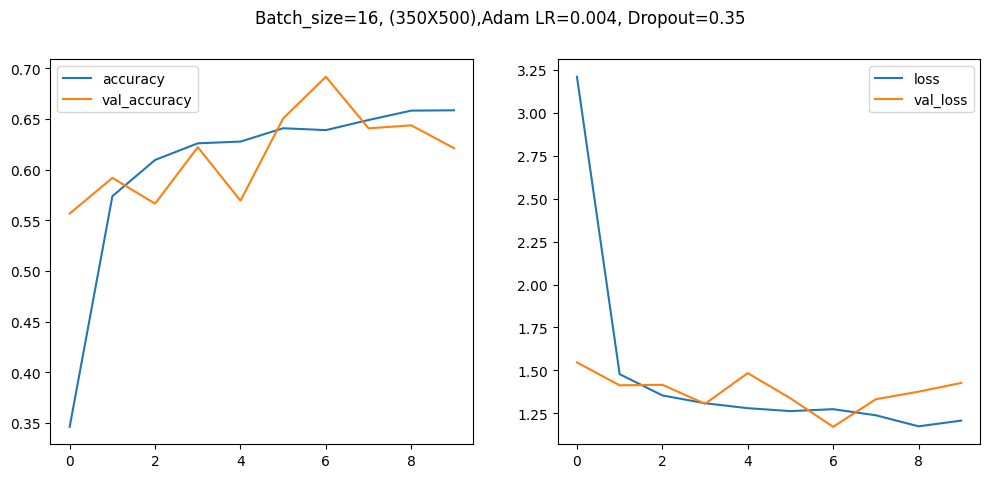

Using best models using callbacks

In [ ]:
final_model = tf.keras.models.load_model('/content/Dog_Breed_Model')

In [ ]:
final_model.summary()

Testing the trained model

In [ ]:
result_val = final_model.predict(val_idg)

In [ ]:
result_val_argmax = np.argmax(result_val, axis=1)

In [ ]:
y_true = val_idg.labels
y_pred = result_val_argmax

In [ ]:
(y_pred == y_true).mean()

0.6154598825831703

In [ ]:
final_model.to_json()

In [ ]:
train_idg.class_indices

**Random Testing from open source**

In [ ]:
!wget https://cdn.britannica.com/79/79479-050-DEB83D3E/Sealyham-terrier.jpg

In [ ]:
image = tf.keras.preprocessing.image.load_img('/content/Sealyham-terrier.jpg', target_size=(350, 500))
image = tf.keras.preprocessing.image.img_to_array(image)
plt.imshow(image.astype('int'))
plt.show()
image = np.expand_dims(image, axis=0)
result = model.predict(image)
data = train_idg.class_indices
for i in list(np.argsort(result)[:,:-5:-1][0]):
  print(list(data.keys())[i],result[:,i]*100)

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

In [ ]:
confusion_matrix(y_true,y_pred)

In [ ]:
plt.figure(figsize=(12,12))
ConfusionMatrixDisplay(confusion_matrix(y_true,y_pred)).plot()

In [ ]:
print(classification_report(y_true,y_pred))

In [ ]:
final_model.save("Dog_Breed_Identification.keras")